In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("data/Sharknado2.csv", encoding = "ISO-8859-1", dtype=object)

data.head(5)

,year,type,country,area,activity,sex_,age,injury,death,species_,index
0,5,Unprovoked,AUSTRALIA,New South Wales,NaN,M,27.36835856337192,Aboriginal rock carving depicts man being atta...,N,NaN,6159
1,77,Unprovoked,NaN,Ionian Sea,Sponge diving,M,27.36835856337192,FATAL,Y,NaN,6158
2,500,Unprovoked,MEXICO,NaN,NaN,M,27.36835856337192,Foot severed,N,NaN,6157
3,1543,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,Pearl diving,M,27.36835856337192,FATAL,Y,NaN,6156
4,1580,Unprovoked,Between PORTUGAL & INDIA,NaN,Man fell overboard from ship. Those on board t...,M,27.36835856337192,"FATAL. ""Shark tore him to pieces.",Y,NaN,6153


In [17]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

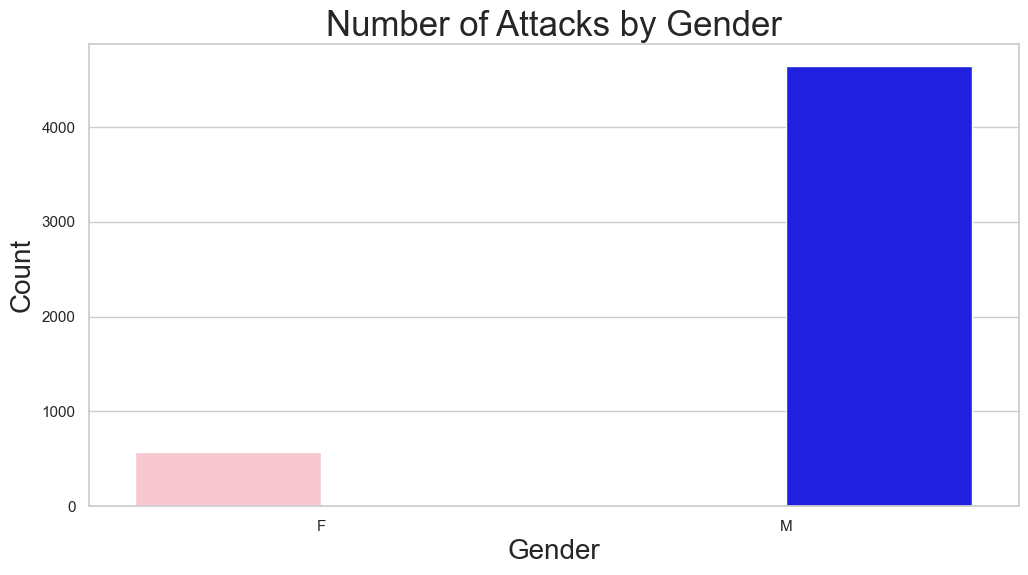

In [18]:
filtered_data = data[data['sex_'].isin(['F', 'M', 'undefined'])]


unique_values = filtered_data['sex_'].unique()


palette = {'M': 'blue', 'F': 'pink', 'undefined': 'gray'}


ax = sns.barplot(x='sex_', y='count', data=filtered_data.groupby('sex_').size().reset_index(name='count'), palette=palette, hue='sex_', dodge=True)

ax.set_title('Number of Attacks by Gender', fontsize=25 )
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Count', fontsize=20);

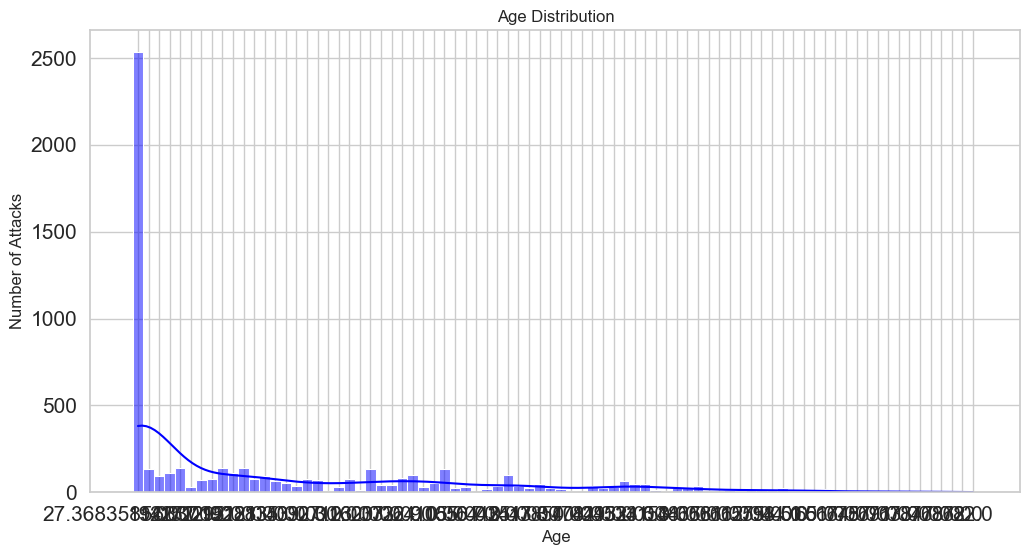

In [19]:
sns.histplot(data["age"], bins=range(5, 70, 5), kde=True, color='blue')

plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Age Distribution")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [21]:
filtered_data = data[(data['year'] >= 1900) & (data['year'] <= 2018) & ~data['sex_'].isin(['N', '.', 'undefined'])]

palette = {'M': 'blue', 'F': 'pink', 'M ': 'cyan', 'lli': 'purple'}

sns.histplot(data=filtered_data, x='year', hue='sex_', multiple="stack", bins=18, palette=palette)

plt.title('Distribution years (1800-2018)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);

TypeError: '>=' not supported between instances of 'str' and 'int'

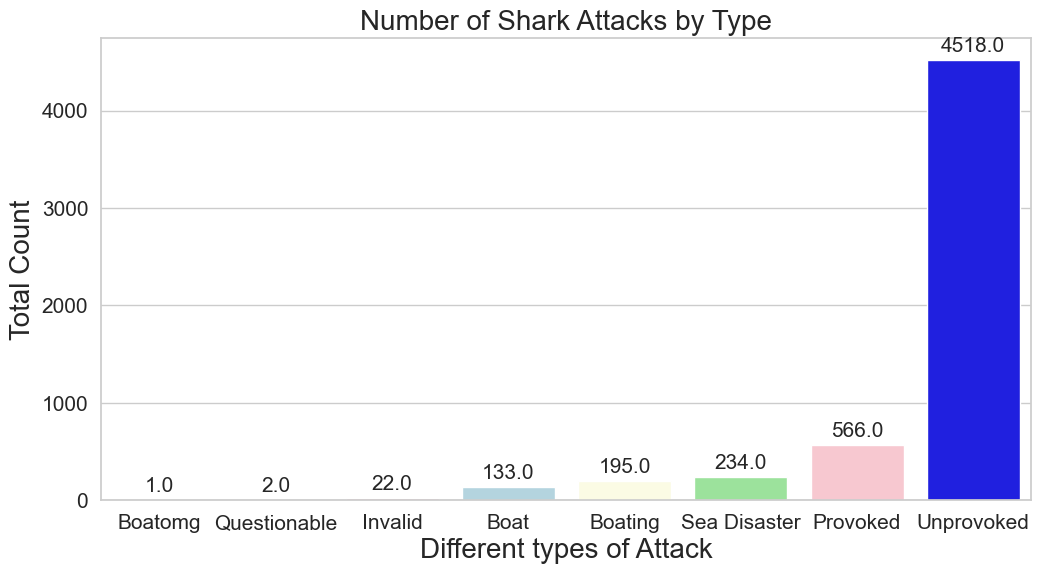

In [22]:
custom_palette = {'Unprovoked': 'blue', 'Boat': 'lightblue', 'Provoked': 'pink', 'Invalid': 'lightpink', 'Sea Disaster': 'lightgreen', 'Boating': 'lightyellow', 'Boatomg': 'yellow', 'Questionable': 'lightgray'}

filtered_data = data[data['type'].isin(custom_palette.keys())]
sorted_data = filtered_data['type'].value_counts().index
reversed_data = list(reversed(sorted_data))

ax = sns.countplot(x='type', hue='type', data=filtered_data, palette=custom_palette, dodge=False, order=reversed_data, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)

ax.set_title('Number of Shark Attacks by Type', fontsize=20)
ax.set_xlabel('Different types of Attack', fontsize=20)
ax.set_ylabel('Total Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [27]:
data['death'] = data['death'].str.strip()
data = data.dropna(subset=['death'])

valid_death_values = ['Y', 'N']
data = data[data['death'].isin(valid_death_values)]



subset_data = data[data['death'].isin(['Y', 'N'])]

subset_data = subset_data[(subset_data['year'] >= 1800) & (subset_data['year'] <= 2020)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='value', hue='death', data=subset_data.groupby(['year', 'death']).size().reset_index(name='value'), palette=['red', 'blue'], marker='o')

plt.title('Shark Attacks Over the Years (Fatal vs Non-Fatal)', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.legend(title='Death', fontsize=12)

# Show the plot
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'int'

Text(0, 0.5, 'Country')

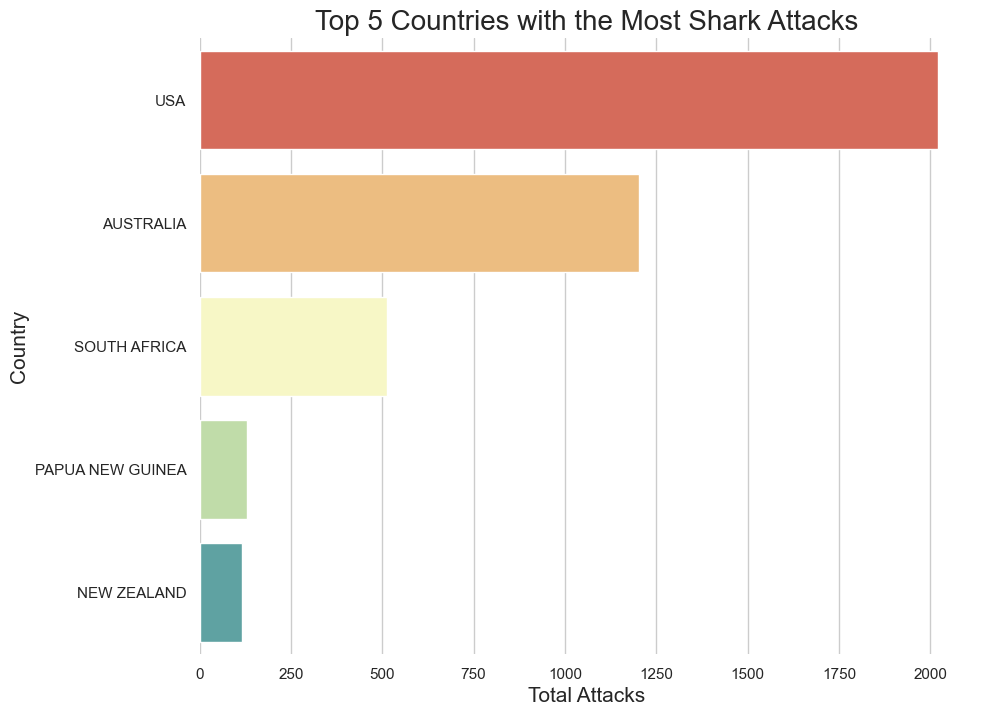

In [25]:
attacks_by_country = data['country'].value_counts().reset_index()
attacks_by_country.columns = ['country', 'total_attacks']


attacks_by_country = attacks_by_country.sort_values(by='total_attacks', ascending=False)

top_5_countries = attacks_by_country.head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='total_attacks', y='country', hue="country", data=top_5_countries, palette="Spectral")

sns.despine(left=True, bottom=True)
plt.title('Top 5 Countries with the Most Shark Attacks', fontsize=20)
plt.xlabel('Total Attacks', fontsize=15)
plt.ylabel('Country', fontsize=15)